<a href="https://colab.research.google.com/github/chiragsharma1690/bitcoin-price-prediction/blob/main/Bitcoin_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
df = pd.read_csv('BTC-USD (1).csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-09,458.205994,462.480988,456.531006,460.483002,460.483002,55493100.0
1,2016-05-10,460.518005,461.928986,448.954010,450.894989,450.894989,58956100.0
2,2016-05-11,450.864014,454.575989,450.864014,452.727997,452.727997,50605200.0
3,2016-05-12,452.446991,454.949005,449.250000,454.765991,454.765991,59849300.0
4,2016-05-13,454.850006,457.054993,453.453003,455.670013,455.670013,60845000.0


In [ ]:
df = df[['Close']]
dataset = df.values
dataset = dataset.astype('float32')
dataset

array([[  460.483],
       [  450.895],
       [  452.728],
       ...,
       [57356.402],
       [58803.777],
       [58188.477]], dtype=float32)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[3.4516910e-04],
       [1.9313442e-04],
       [2.2220006e-04],
       ...,
       [9.0252781e-01],
       [9.2547846e-01],
       [9.1572177e-01]], dtype=float32)

In [ ]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

1224 603


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 10
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test, look_back=look_back)
trainX

array([[3.4516910e-04, 1.9313442e-04, 2.2220006e-04, ..., 2.4495460e-04,
        2.3892894e-04, 2.5218492e-04],
       [1.9313442e-04, 2.2220006e-04, 2.5451602e-04, ..., 2.3892894e-04,
        2.5218492e-04, 0.0000000e+00],
       [2.2220006e-04, 2.5451602e-04, 2.6885094e-04, ..., 2.5218492e-04,
        0.0000000e+00, 6.2808394e-05],
       ...,
       [1.4777283e-01, 1.5710911e-01, 1.6149792e-01, ..., 1.5860783e-01,
        1.5692222e-01, 1.5344961e-01],
       [1.5710911e-01, 1.6149792e-01, 1.6103734e-01, ..., 1.5692222e-01,
        1.5344961e-01, 1.5443902e-01],
       [1.6149792e-01, 1.6103734e-01, 1.6073669e-01, ..., 1.5344961e-01,
        1.5443902e-01, 1.5811390e-01]], dtype=float32)

In [ ]:
trainY

array([0.0000000e+00, 6.2808394e-05, 7.0926733e-05, ..., 1.5443902e-01,
       1.5811390e-01, 1.5732771e-01], dtype=float32)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=256, verbose=2)

Epoch 1/100
5/5 - 2s - loss: 0.0068
Epoch 2/100
5/5 - 0s - loss: 0.0055
Epoch 3/100
5/5 - 0s - loss: 0.0044
Epoch 4/100
5/5 - 0s - loss: 0.0035
Epoch 5/100
5/5 - 0s - loss: 0.0028
Epoch 6/100
5/5 - 0s - loss: 0.0023
Epoch 7/100
5/5 - 0s - loss: 0.0020
Epoch 8/100
5/5 - 0s - loss: 0.0017
Epoch 9/100
5/5 - 0s - loss: 0.0016
Epoch 10/100
5/5 - 0s - loss: 0.0015
Epoch 11/100
5/5 - 0s - loss: 0.0014
Epoch 12/100
5/5 - 0s - loss: 0.0014
Epoch 13/100
5/5 - 0s - loss: 0.0013
Epoch 14/100
5/5 - 0s - loss: 0.0012
Epoch 15/100
5/5 - 0s - loss: 0.0011
Epoch 16/100
5/5 - 0s - loss: 0.0010
Epoch 17/100
5/5 - 0s - loss: 9.3925e-04
Epoch 18/100
5/5 - 0s - loss: 8.6376e-04
Epoch 19/100
5/5 - 0s - loss: 7.9044e-04
Epoch 20/100
5/5 - 0s - loss: 7.2159e-04
Epoch 21/100
5/5 - 0s - loss: 6.5758e-04
Epoch 22/100
5/5 - 0s - loss: 5.9547e-04
Epoch 23/100
5/5 - 0s - loss: 5.3795e-04
Epoch 24/100
5/5 - 0s - loss: 4.8543e-04
Epoch 25/100
5/5 - 0s - loss: 4.3734e-04
Epoch 26/100
5/5 - 0s - loss: 3.9277e-04
Epoch 2

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 622.09 RMSE


ValueError: ignored

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

In [ ]:

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict

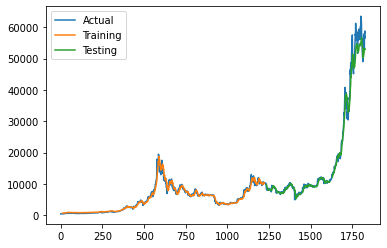

In [ ]:
plt.plot(df['Close'], label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=df.index).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=df.index).close, label='Testing')
plt.legend(loc='best')
plt.show()